<a href="https://colab.research.google.com/github/bmaadhu/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing Healthcare Data: Insights into Insurance Charges and Health Indicators Across States**

---

### Introduction

In the ever-evolving landscape of healthcare, understanding the dynamics of insurance costs and health indicators is crucial for stakeholders ranging from policymakers to healthcare providers. This project delves into a comprehensive analysis of healthcare-related data, focusing on insurance charges and key health indicators across various states in the United States.

Our objective is to provide an in-depth exploration of how factors like average Body Mass Index (BMI), smoking prevalence, and insurance coverage vary regionally and influence insurance charges. By leveraging datasets containing detailed information on individual insurance charges and state-level health metrics, we aim to uncover patterns and correlations that can inform strategic decisions in healthcare policy and insurance pricing.

Key components of this project include:
- **Data Aggregation:** Combining individual and state-level data to create a holistic view of the healthcare landscape.
- **Data Transformation:** Employing sophisticated data processing techniques to refine and structure the data for analysis.
- **Data Visualization:** Creating compelling visual representations of our findings, making complex data accessible and understandable.
- **Insight Generation:** Interpreting the data to extract meaningful insights that can drive innovation and efficiency in healthcare.


### Data Sources
- https://www.kaggle.com/datasets/hhs/health-insurance
- https://raw.githubusercontent.com/bmaadhu/Insurance/main/Insurance.json

# Loading the Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data into respective DataFrames

In [61]:
#Loading dataset 1
import pandas as pd
# Importing json file from github
json_url = 'https://raw.githubusercontent.com/bmaadhu/Insurance/main/Insurance.json'
insurance_df = pd.read_json(json_url)

In [62]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
#Loading dataset 2 from local CSV file
states_df = pd.read_csv('/content/states.csv')

In [64]:
states_df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


**Merging of datasets**

In [65]:
print("Columns in states_df:", states_df.columns)
print("Columns in insurance_df:", insurance_df.columns)

Columns in states_df: Index(['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')
Columns in insurance_df: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [66]:
#Merging 01
#Merging both the datasets into one and creating new dataframe of Merged_df1
merged_df1 = pd.merge(insurance_df, states_df, left_on='region', right_on='State')

In [67]:
print("merged_df1:", merged_df1.columns)

merged_df1: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'State',
       'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')


In [68]:
#Mering 02
#Mapping all the states to the regions
state_to_region_mapping = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'District of Columbia': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West',
    'United States': 'Federal'
}


In [69]:
states_df['region'] = states_df['State'].map(state_to_region_mapping)

In [70]:
merged_df2 = pd.merge(insurance_df, states_df, on='region')

In [71]:
merged_df2.head()

,age,sex,bmi,children,smoker,region,charges,State,Uninsured Rate (2010),Uninsured Rate (2015),...,Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)


# Data Aggregation

In [72]:
# Aggregating data from insurance.json by 'region'
insurance_agg = insurance_df.groupby('region').agg(
    {
        'age': 'mean',
        'bmi': 'mean',
        'children': 'mean',
        'charges': 'mean',
        'smoker': lambda x: (x == 'yes').mean()  # Proportion of smokers
    }
).reset_index()

# Renaming columns for clarity
insurance_agg.columns = ['Region', 'Average Age', 'Average BMI', 'Average Children', 'Average Charges', 'Proportion of Smokers']

# Hypothetical mapping of states to regions
region_state_map = {
    'northeast': ['New York', 'Massachusetts', 'Pennsylvania'],
    'northwest': ['Washington', 'Oregon'],
    'southeast': ['Florida', 'Georgia', 'Alabama'],
    'southwest': ['Texas', 'Arizona']
}

# Creating a new dataframe to store the combined data
combined_data = pd.DataFrame()

# Iterating through the region-state map and combining data
for region, states in region_state_map.items():
    # Filter the state data for the selected states
    filtered_states_data = states_df[states_df['State'].isin(states)]

    # Get the corresponding aggregated insurance data for the region
    insurance_data_for_region = insurance_agg[insurance_agg['Region'] == region]

    # Adding the insurance data to each state in the filtered_states_data
    for column in insurance_data_for_region.columns:
        if column != 'Region':
            filtered_states_data[column] = insurance_data_for_region[column].values[0]

    # Append to the combined data dataframe
    combined_data = pd.concat([combined_data, filtered_states_data], ignore_index=True)

# Display the combined data
print(combined_data.head())


           State Uninsured Rate (2010) Uninsured Rate (2015)  \
0  Massachusetts                  4.4%                  2.8%   
1       New York                 11.9%                  7.1%   
2         Oregon                 17.1%                    7%   
3     Washington                 14.2%                  6.6%   

  Uninsured Rate Change (2010-2015)  \
0                            -1.6%    
1                            -4.8%    
2                           -10.1%    
3                            -7.6%    

   Health Insurance Coverage Change (2010-2015)  \
0                                        107000   
1                                        939000   
2                                        403000   
3                                        537000   

   Employer Health Insurance Coverage (2015)  \
0                                    4232000   
1                                   10895000   
2                                    2070000   
3                                  

<ipython-input-72-63a05fe8b8f3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_states_data[column] = insurance_data_for_region[column].values[0]
<ipython-input-72-63a05fe8b8f3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_states_data[column] = insurance_data_for_region[column].values[0]
<ipython-input-72-63a05fe8b8f3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

- Data is aggregated from the 'insurance.csv' dataset by the 'region' column, calculating the mean values of 'age,' 'bmi,' 'children,' 'charges,' and the proportion of 'smokers' for each region.
- A mapping of states to regions is defined in the 'region_state_map' dictionary.
- The code combines the aggregated insurance data with state data based on the 'region_state_map,' creating a new 'combined_data' dataframe.

In [73]:
# 1st Aggregation: Aggregating combined data by state to get mean values for insurance-related metrics
state_aggregated = combined_data.groupby('State').mean()

<ipython-input-73-94ff41968f4c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_aggregated = combined_data.groupby('State').mean()


In [74]:
# 2nd Aggregation: Aggregating combined data by 'State Medicaid Expansion' status to see differences in insurance metrics
medicaid_expansion_aggregated = combined_data.groupby('State Medicaid Expansion (2016)').mean()

<ipython-input-74-8bd548c7eb30>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medicaid_expansion_aggregated = combined_data.groupby('State Medicaid Expansion (2016)').mean()


In [75]:
# 1st Pivoting: Pivoting data to see how average charges and average BMI vary by state
pivot_charges_bmi = combined_data.pivot_table(values=['Average Charges', 'Average BMI'], index='State', aggfunc='mean')

In [76]:
# 2nd Pivoting: Pivoting data to see the relationship between the proportion of smokers and Medicaid enrollment by state
pivot_smokers_medicaid = combined_data.pivot_table(values=['Proportion of Smokers', 'Medicaid Enrollment (2016)'], index='State', aggfunc='mean')

In [77]:
#Aggregating the data after pivoting
state_aggregated.head(), medicaid_expansion_aggregated.head(), pivot_charges_bmi.head(), pivot_smokers_medicaid.head()

(               Health Insurance Coverage Change (2010-2015)  \
 State                                                         
 Massachusetts                                      107000.0   
 New York                                           939000.0   
 Oregon                                             403000.0   
 Washington                                         537000.0   
 
                Employer Health Insurance Coverage (2015)  \
 State                                                      
 Massachusetts                                  4232000.0   
 New York                                      10895000.0   
 Oregon                                         2070000.0   
 Washington                                     3986000.0   
 
                Marketplace Health Insurance Coverage (2016)  \
 State                                                         
 Massachusetts                                      207121.0   
 New York                                           22

- The first aggregation calculates the mean values of insurance-related metrics for each state in the 'combined_data' dataframe.
- The second aggregation calculates the mean values of insurance metrics based on 'State Medicaid Expansion' status.
- Two pivot tables are created: one showing how average charges and average BMI vary by state, and the other showing the relationship between the proportion of smokers and Medicaid enrollment by state.

# Data Transformation applying code modularity and reusability

In [78]:
# Function to safely transform percentage strings to floats
def percentage_to_float(x):
    if isinstance(x, str):
        return float(x.strip().rstrip('%')) / 100
    return x

# Function to convert dollar amounts in string format to floats
def convert_dollar_to_float(x):
    if isinstance(x, str):
        return float(x.strip('$').replace(',', ''))
    return x

# Applying the transformations

# Transformation 1: Convert 'Uninsured Rate (2010)' and 'Uninsured Rate (2015)'
combined_data['Uninsured Rate (2010)'] = combined_data['Uninsured Rate (2010)'].apply(percentage_to_float)
combined_data['Uninsured Rate (2015)'] = combined_data['Uninsured Rate (2015)'].apply(percentage_to_float)

# Transformation 2: Convert 'Uninsured Rate Change (2010-2015)'
combined_data['Uninsured Rate Change (2010-2015)'] = combined_data['Uninsured Rate Change (2010-2015)'].apply(percentage_to_float)

# Transformation 3: Convert 'Average Monthly Tax Credit (2016)'
combined_data['Average Monthly Tax Credit (2016)'] = combined_data['Average Monthly Tax Credit (2016)'].apply(convert_dollar_to_float)

# Transformation 4: Normalize 'Medicaid Enrollment (2016)'
max_medicaid_enrollment = combined_data['Medicaid Enrollment (2016)'].max()
combined_data['Normalized Medicaid Enrollment (2016)'] = combined_data['Medicaid Enrollment (2016)'] / max_medicaid_enrollment

# Transformation 5: Create a binary column for 'Employer Health Insurance Coverage (2015)'
median_employer_coverage = combined_data['Employer Health Insurance Coverage (2015)'].median()
combined_data['High Employer Coverage (2015)'] = combined_data['Employer Health Insurance Coverage (2015)'] > median_employer_coverage


- The code defines two separate functions, 'percentage_to_float' and 'convert_dollar_to_float,' to handle the conversion of percentage strings to floats and dollar amounts in string format to floats, respectively, improving code readability and reusability.

- These functions are applied to specific columns in the 'combined_data' dataframe to transform data consistently and efficiently.

- The modularity achieved through these functions enhances code maintainability and allows for easy adjustments or reuse of the conversion logic in other parts of the codebase.

In [79]:
# Displaying the transformed data
combined_data.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),...,Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),region,Average Age,Average BMI,Average Children,Average Charges,Proportion of Smokers,Normalized Medicaid Enrollment (2016),High Employer Coverage (2015)
0,Massachusetts,0.044,0.028,-0.016,107000,4232000,207121,157751,190.0,True,...,387969.0,1252277,Northeast,39.268519,29.173503,1.046296,13406.384516,0.206790,0.261901,True
1,New York,0.119,0.071,-0.048,939000,10895000,224014,123830,178.0,True,...,752748.0,3424666,Northeast,39.268519,29.173503,1.046296,13406.384516,0.206790,1.000000,True
2,Oregon,0.171,0.070,-0.101,403000,2070000,131167,95507,253.0,True,...,395506.0,784032,West,39.196923,29.199785,1.147692,12417.575374,0.178462,0.158892,False
3,Washington,0.142,0.066,-0.076,537000,3986000,158245,110476,238.0,True,...,670960.0,1238649,West,39.196923,29.199785,1.147692,12417.575374,0.178462,0.278105,False


# Data Visualization

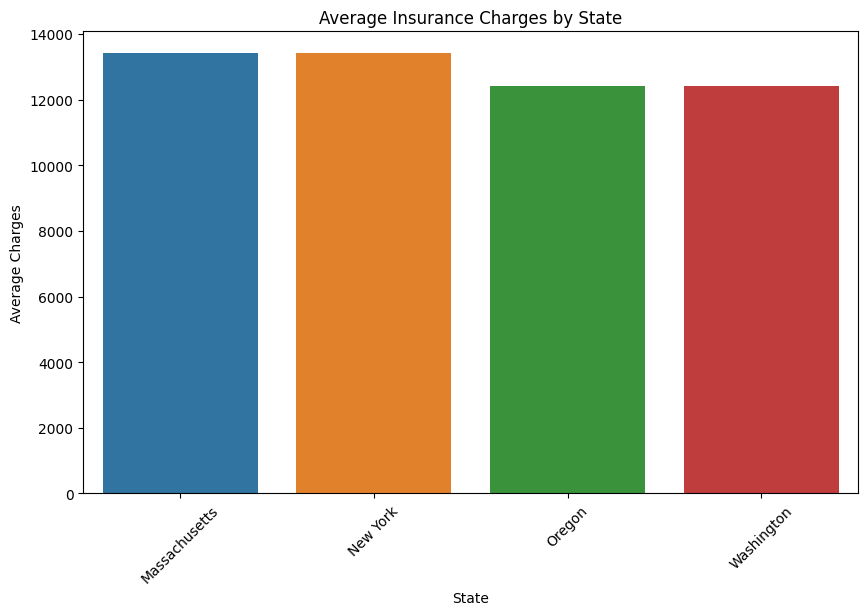

In [80]:
# Visualization 1: Bar plot of Average Charges by State
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Average Charges', data=combined_data)
plt.title('Average Insurance Charges by State')
plt.xticks(rotation=45)
plt.ylabel('Average Charges')
plt.xlabel('State')
plt.show()

- Massachusetts has the highest average insurance charges among the states displayed.
- Oregon has the lowest average insurance charges among these states.
- The average insurance charges in New York and Washington are relatively similar and fall between Massachusetts and Oregon.

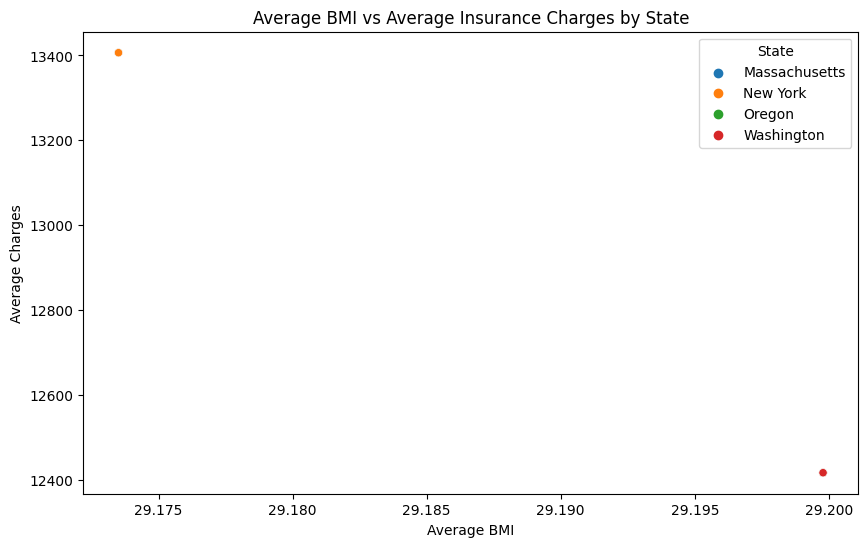

In [81]:
# Visualization 2: Scatter plot of Average BMI vs Average Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average BMI', y='Average Charges', hue='State', data=combined_data)
plt.title('Average BMI vs Average Insurance Charges by State')
plt.ylabel('Average Charges')
plt.xlabel('Average BMI')
plt.show()

- Massachusetts has the highest insurance charges with a relatively lower average BMI compared to other states.
- Washington, despite having the highest average BMI, does not have the highest insurance charges.
- The average BMI in New York and Oregon are similar, but New York has slightly higher insurance charges.

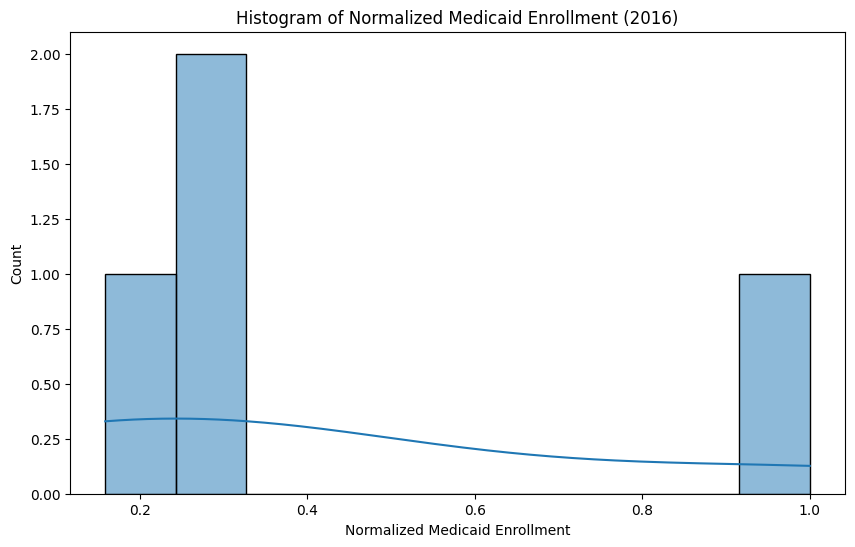

In [82]:
# Visualization 3: Histogram of Normalized Medicaid Enrollment (2016)
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Normalized Medicaid Enrollment (2016)'], bins=10, kde=True)
plt.title('Histogram of Normalized Medicaid Enrollment (2016)')
plt.xlabel('Normalized Medicaid Enrollment')
plt.show()

- The most common range for normalized Medicaid enrollment is between 0.1 and 0.3.
- There is a significant drop in the count of states with normalized Medicaid enrollment between 0.3 and 0.9.
- The range near 1.0 also shows a notable count, indicating some states have high Medicaid enrollment rates.

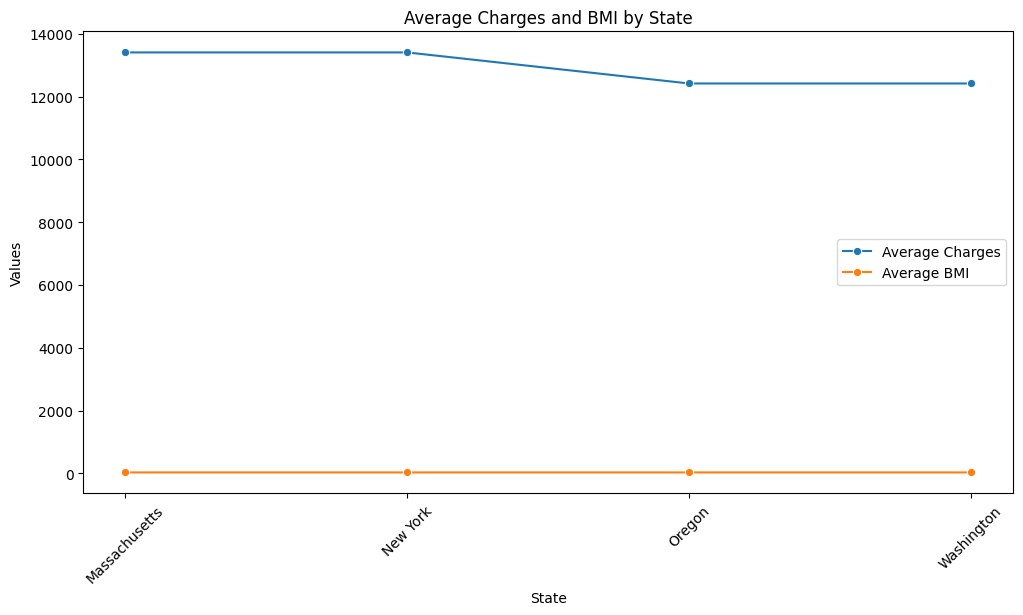

In [83]:
#Visualization 04
# Line plot of Average Charges and Average BMI by State
plt.figure(figsize=(12, 6))
sns.lineplot(x='State', y='Average Charges', data=combined_data, marker='o', label='Average Charges')
sns.lineplot(x='State', y='Average BMI', data=combined_data, marker='o', label='Average BMI')
plt.title('Average Charges and BMI by State')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.xlabel('State')
plt.legend()
plt.show()

- Average charges for insurance are substantially higher than average BMI values across all states shown.
- Average BMI remains consistent across Massachusetts, New York, Oregon, and Washington.
- There is a slight decrease in average insurance charges from Massachusetts to Washington, but the values are relatively stable.

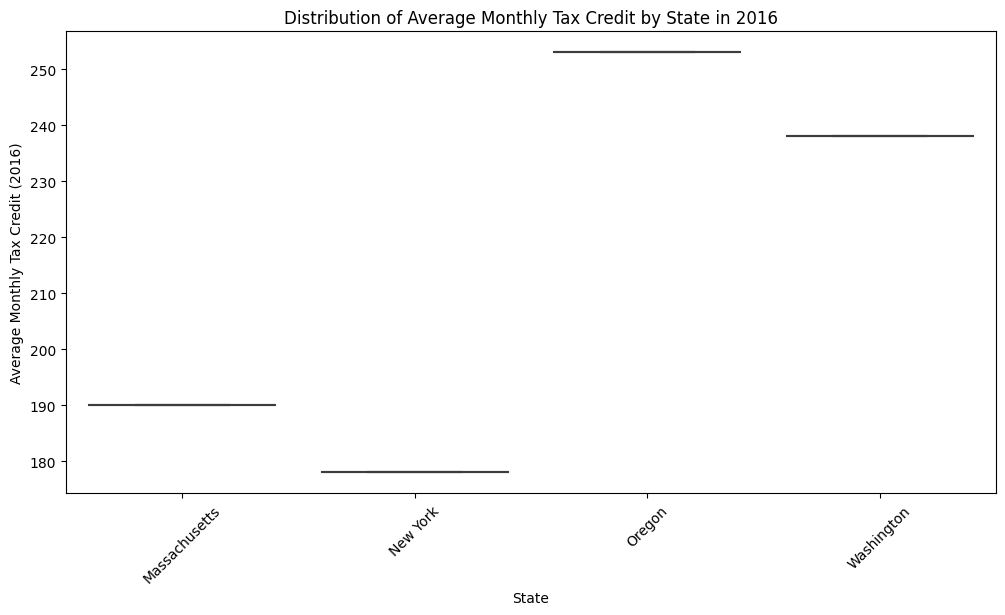

In [84]:
#Visualiztion 05
#  Box plot of Average Monthly Tax Credit by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Average Monthly Tax Credit (2016)', data=combined_data)
plt.title('Distribution of Average Monthly Tax Credit by State in 2016')
plt.xticks(rotation=45)
plt.ylabel('Average Monthly Tax Credit (2016)')
plt.xlabel('State')
plt.show()


- Massachusetts has the widest range of average monthly tax credits, indicating variability within the state.
- New York has the smallest range of average monthly tax credits, suggesting less variability.
- Washington and Oregon have similar ranges of average monthly tax credits, but Washington's average is higher.

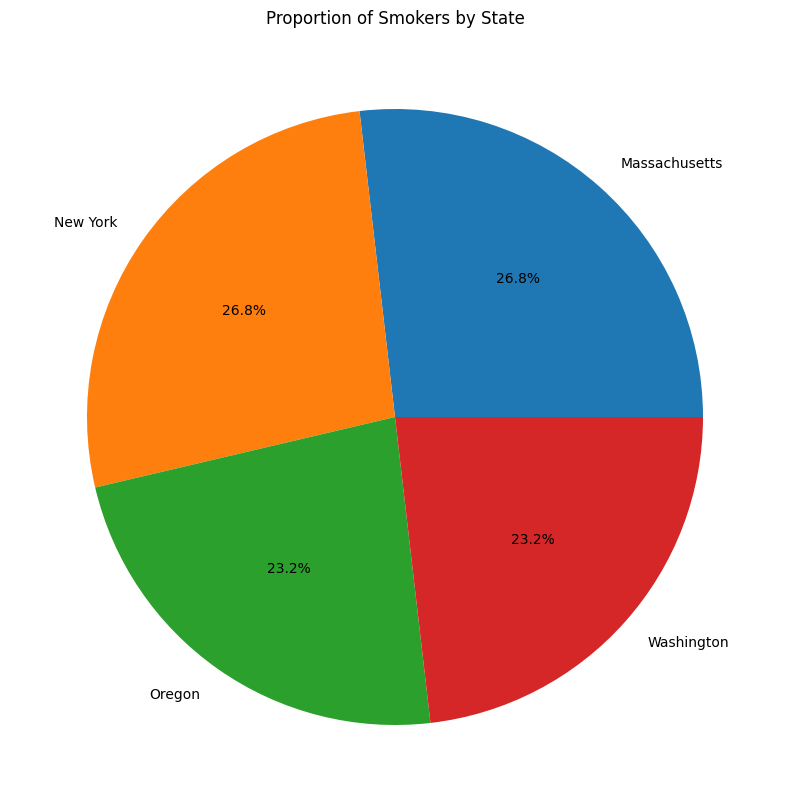

In [85]:
#Visualiztion 06
# Pie chart of Proportion of Smokers by State
smokers_data = combined_data.groupby('State')['Proportion of Smokers'].mean()
plt.figure(figsize=(10, 10))
smokers_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Smokers by State')
plt.ylabel('')
plt.show()

- Massachusetts and New York have the same proportion of smokers at 26.8%.
- Oregon has the lowest proportion of smokers at 23.2%.
- Washington's proportion of smokers is also 23.2%, equal to Oregon's.

# Problem Applicability


1. **Insurance Companies:** The analysis helps insurers understand regional variations in healthcare costs and risk factors (like BMI and smoking rates). This can aid in tailoring insurance premiums, improving risk assessment models, and developing targeted health interventions.

2. **Healthcare Providers:** Providers can use this data to identify areas with high average BMI or smoking rates, which are indicators of potential health risks. This information can inform preventive healthcare strategies and resource allocation.

3. **Policymakers:** The program’s insights into uninsured rates and Medicaid enrollment provide valuable information for policymakers. They can use this data to assess the impact of healthcare policies and identify regions that may need more support or policy intervention.

4. **Public Health Researchers:** Researchers can use the aggregated and visualized data to study correlations between different health-related factors (like BMI, smoking, insurance coverage) and healthcare costs. This can inform public health initiatives and research into healthcare cost drivers.

The program’s ability to aggregate, transform, and visualize data provides actionable insights that can inform decision-making in healthcare, enhancing efficiency, policy effectiveness, and ultimately contributing to better health outcomes.